In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext, ROUND_HALF_UP
import pandas as pd
import seaborn as sns

In [2]:
def get_circ(pos_xy):
    
    pos_circ = []
    for i in range(len(pos_xy)):
        pos_xy_i = pos_xy[i]
        r = np.linalg.norm(pos_xy_i)
        th = np.arctan2(pos_xy_i[1], pos_xy_i[0]) #*180 /np.pi
        pos_circ.append( [r, th])
    
    return np.array(pos_circ)


def get_heatmap_circ(pos_circ):
    n_azm = 36
    n_r = 18
    
    azm = np.linspace(-np.pi, np.pi, n_azm + 1)
    r = np.linspace(-0.05, 0.75, n_r + 1)

    z = np.zeros((n_azm, n_r))

    for i in range(len(pos_circ)):
        radius = pos_circ[i][0]
        angle = pos_circ[i][1]

        for j in range(len(azm) - 1):
            if azm[j] <= angle < azm[j + 1]:
                for k in range(len(r) - 1):
                    if r[k] <= radius < r[k + 1]:
                        z[j][k] += 1
                        break
                break

    return z


def initial_pass_check(attacker1_pos_episode, attacker2_pos_episode, attacker3_pos_episode, ball_pos_episode, threshold=1e-2):
    dist_now_1 = np.linalg.norm(attacker1_pos_episode[0] - ball_pos_episode[0])
    dist_now_2 = np.linalg.norm(attacker2_pos_episode[0] - ball_pos_episode[0])
    dist_now_3 = np.linalg.norm(attacker3_pos_episode[0] - ball_pos_episode[0])
    
    if dist_now_1 > threshold and dist_now_2 > threshold and dist_now_3 > threshold:
        if dist_now_1 < dist_now_2 and dist_now_1 < dist_now_3:
            pass_outcome_a1 = 1
            pass_outcome_a2 = 0
            pass_outcome_a3 = 0
        elif dist_now_2 < dist_now_1 and dist_now_2 < dist_now_3:
            pass_outcome_a1 = 0
            pass_outcome_a2 = 1
            pass_outcome_a3 = 0
        elif dist_now_3 < dist_now_1 and dist_now_3 < dist_now_1:
            pass_outcome_a1 = 0
            pass_outcome_a2 = 0
            pass_outcome_a3 = 1
    
    else:
        pass_outcome_a1 = 0
        pass_outcome_a2 = 0
        pass_outcome_a3 = 0

    return pass_outcome_a1, pass_outcome_a2, pass_outcome_a3


def last_pass_check(defender_pos_episode, ball_pos_episode, threshold=1e-2):
    dist_now = np.linalg.norm(defender_pos_episode[-1] - ball_pos_episode[-1])
    
    if dist_now < threshold:
        last_pass = 0
    else:
        last_pass = 1

    return last_pass


def get_last_pass_index(pass_outcome):
    try:
        return len(pass_outcome) - 1 - pass_outcome[::-1].index(1)
    except ValueError:
        return -1

# Fig. 3b,c

In [ ]:
# alphabets = list("ABCDEFGHI") 
alphabets = list("E") 

for alphabet in alphabets:
    
    fig = plt.figure(figsize=(30,20))
    sns.set()
    sns.set_style('white')
    sns.set_palette('Set3')
    
    con_alphabet = alphabet
    print('----', con_alphabet, '----')
    
    for sub_num in range(28):
        
        ax = fig.add_subplot(4, 7, sub_num +1)
        ax.set_title('sub' + str(sub_num + 1))
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_xlabel("X-position")
        ax.set_ylabel("Y-position")
        ax.set_aspect('equal')
        
        sub = '{0:03d}'.format(sub_num+1)
        
        pos_a1_con = []
        pos_a2_con = []
        pos_a3_con = []
        for con_num in range(3):
            '''A1, A2, A3'''

            condition = con_alphabet + str(con_num + 1)
            
            load_name = "../data/sub/sub" + sub +"/sub" + sub +"_" + condition + ".npy"
            pos_list = np.load(load_name, allow_pickle=True) 
            
            episodes = range(8)
            for episode in episodes:

                pos_episode = pos_list[episode]

                attacker1_pos_episode = pos_episode[1]
                attacker2_pos_episode = pos_episode[2]
                attacker3_pos_episode = pos_episode[3]
                
                pos_a1_con.extend(attacker1_pos_episode)
                pos_a2_con.extend(attacker2_pos_episode)
                pos_a3_con.extend(attacker3_pos_episode)
        
        pos_circ_a1 = get_circ(pos_a1_con)
        heatmap_a1 = get_heatmap_circ(pos_circ_a1)
        pos_circ_a2 = get_circ(pos_a2_con)
        heatmap_a2 = get_heatmap_circ(pos_circ_a2)
        pos_circ_a3 = get_circ(pos_a3_con)
        heatmap_a3 = get_heatmap_circ(pos_circ_a3)
        
        r = np.linspace(-0.05, 0.75, 18)
        a = np.linspace(-np.pi , np.pi, 36)
        R, A = np.meshgrid(r, a)
        X, Y = R*np.cos(A), R*np.sin(A)
        
        cf = ax.contourf(X, Y, heatmap_a1, levels=10, cmap='Reds', alpha=0.5)
        cf = ax.contourf(X, Y, heatmap_a2, levels=10, cmap='Greens', alpha=0.5)
        cf = ax.contourf(X, Y, heatmap_a3, levels=10, cmap='Blues', alpha=0.5)
        cf.set_clim(1, 800)

        ax.axis('off')

    plt.tight_layout()
    plt.show()


---- E ----


# Fig. 3d-f

50
---- E ----


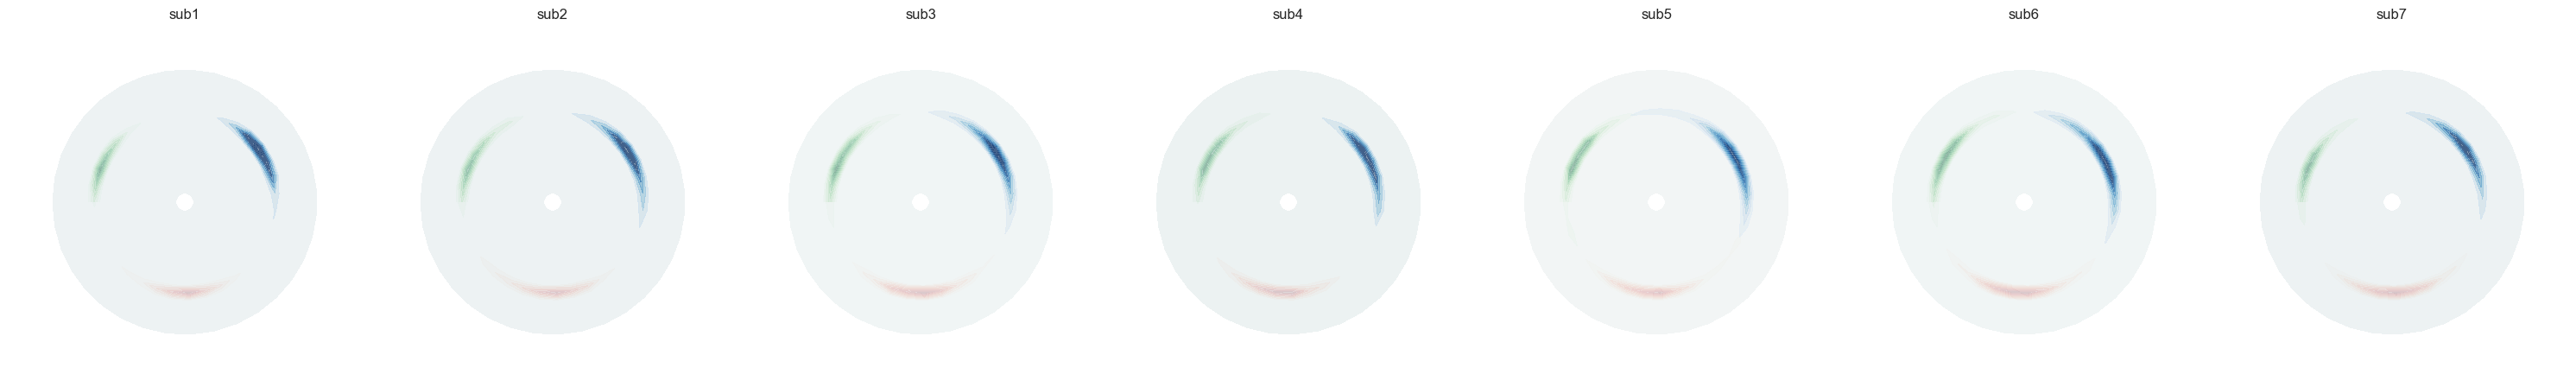

45
---- E ----


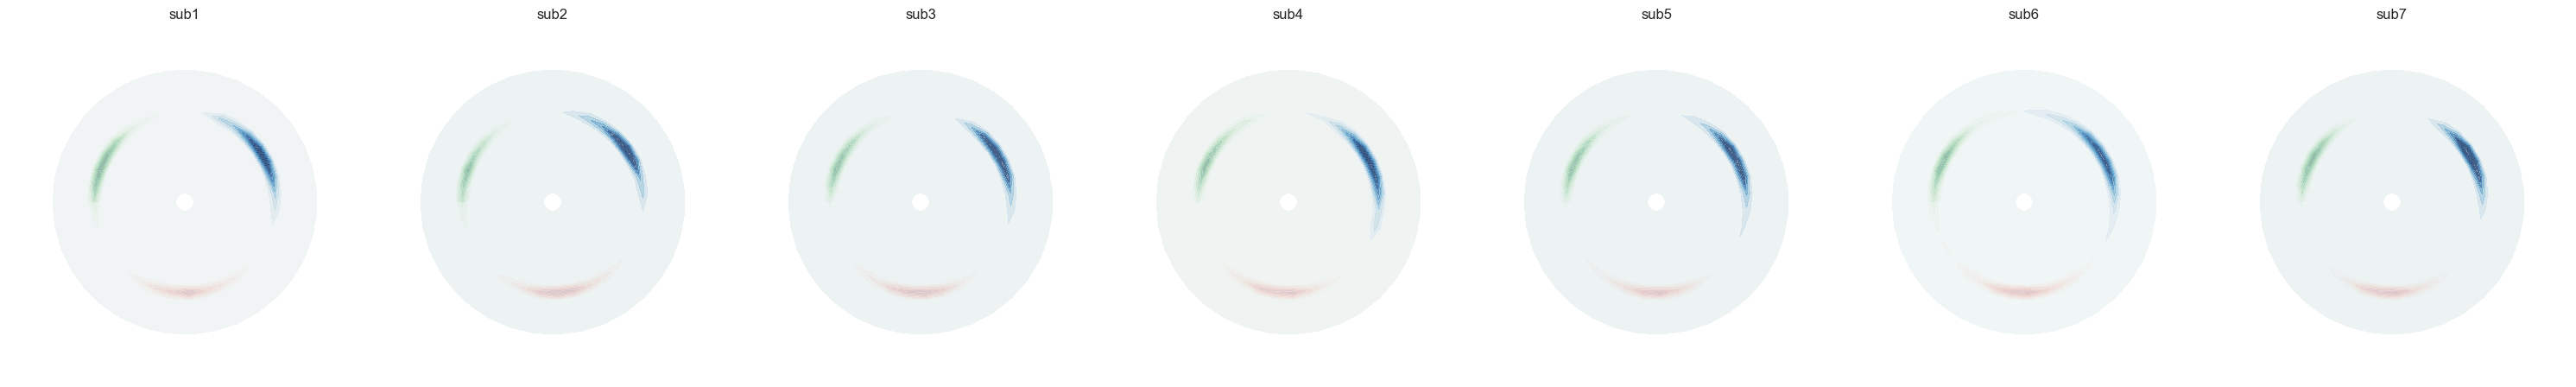

40
---- E ----


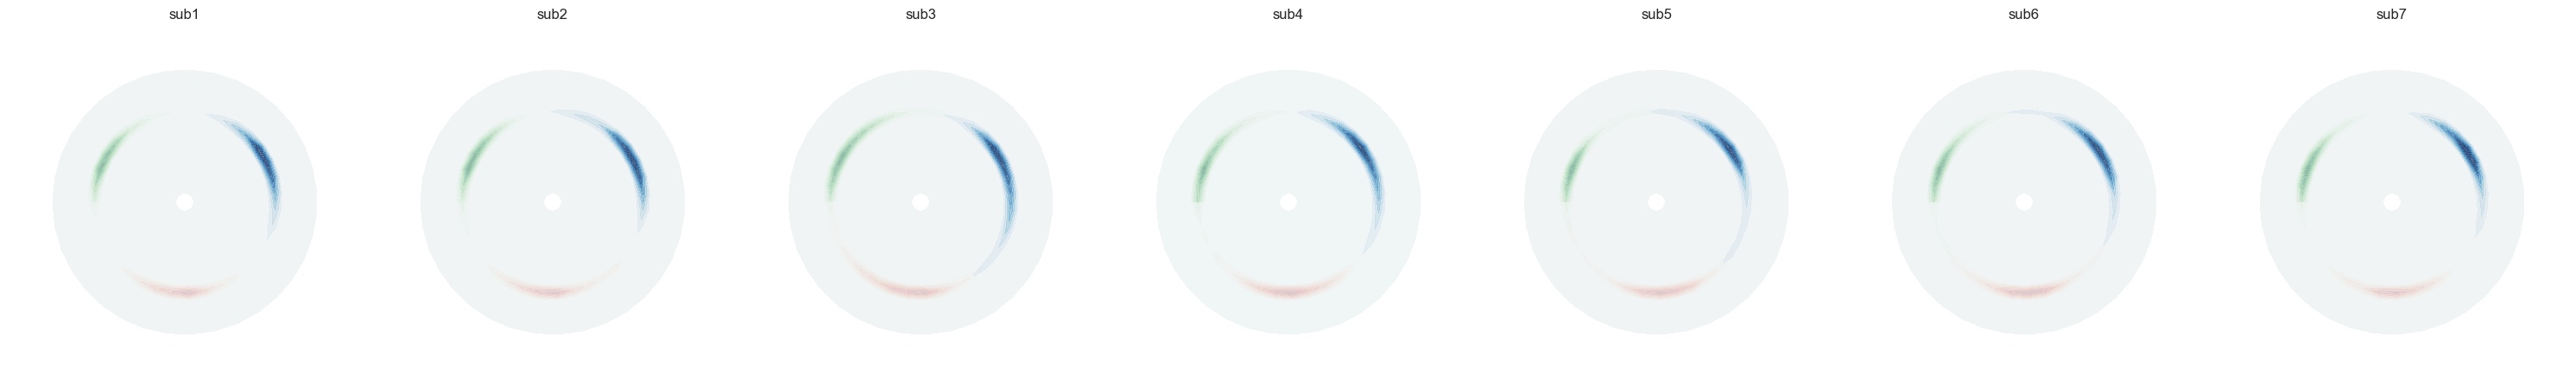

35
---- E ----


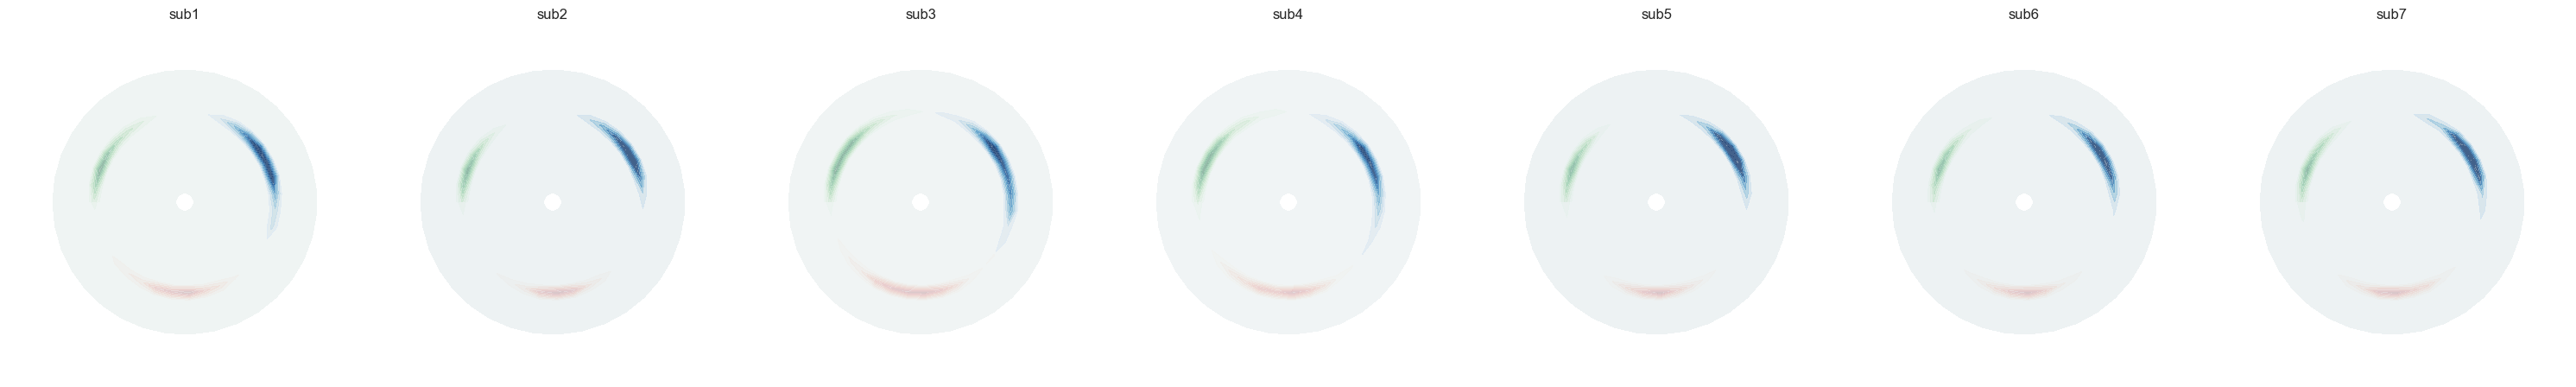

30
---- E ----


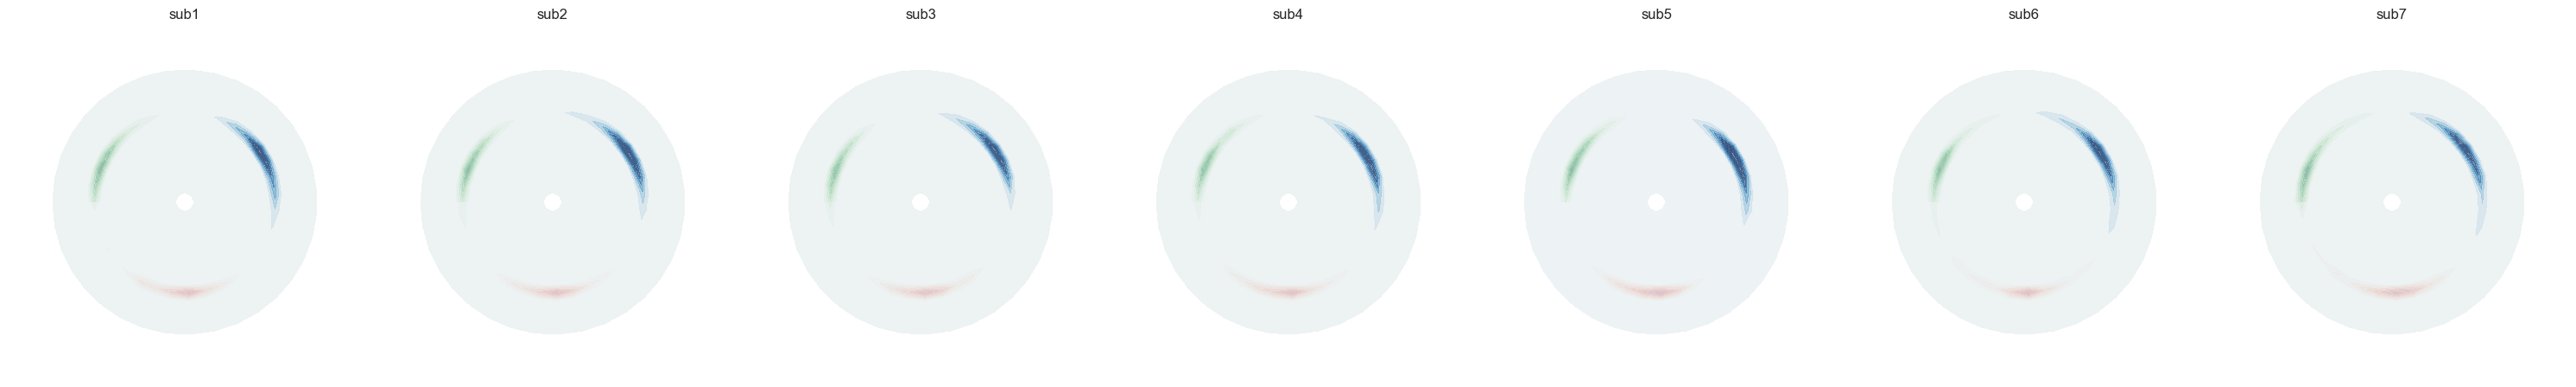

25
---- E ----


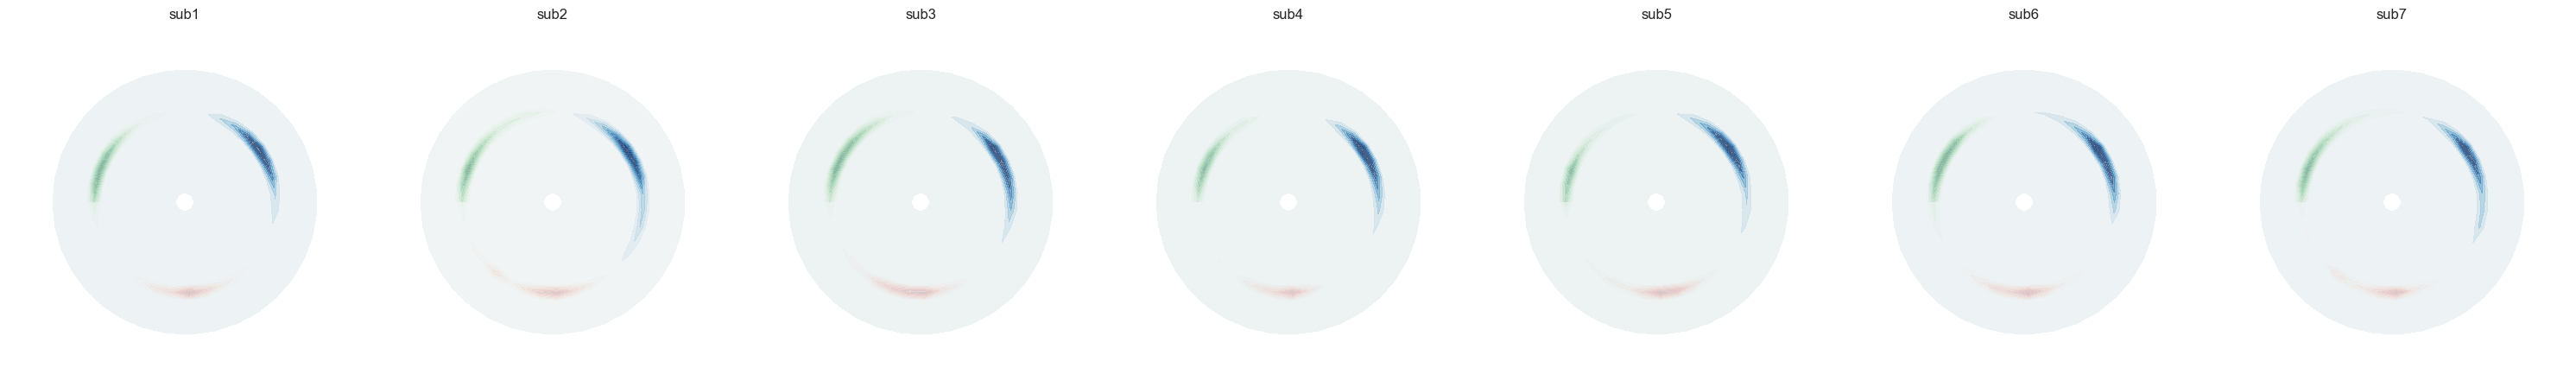

20
---- E ----


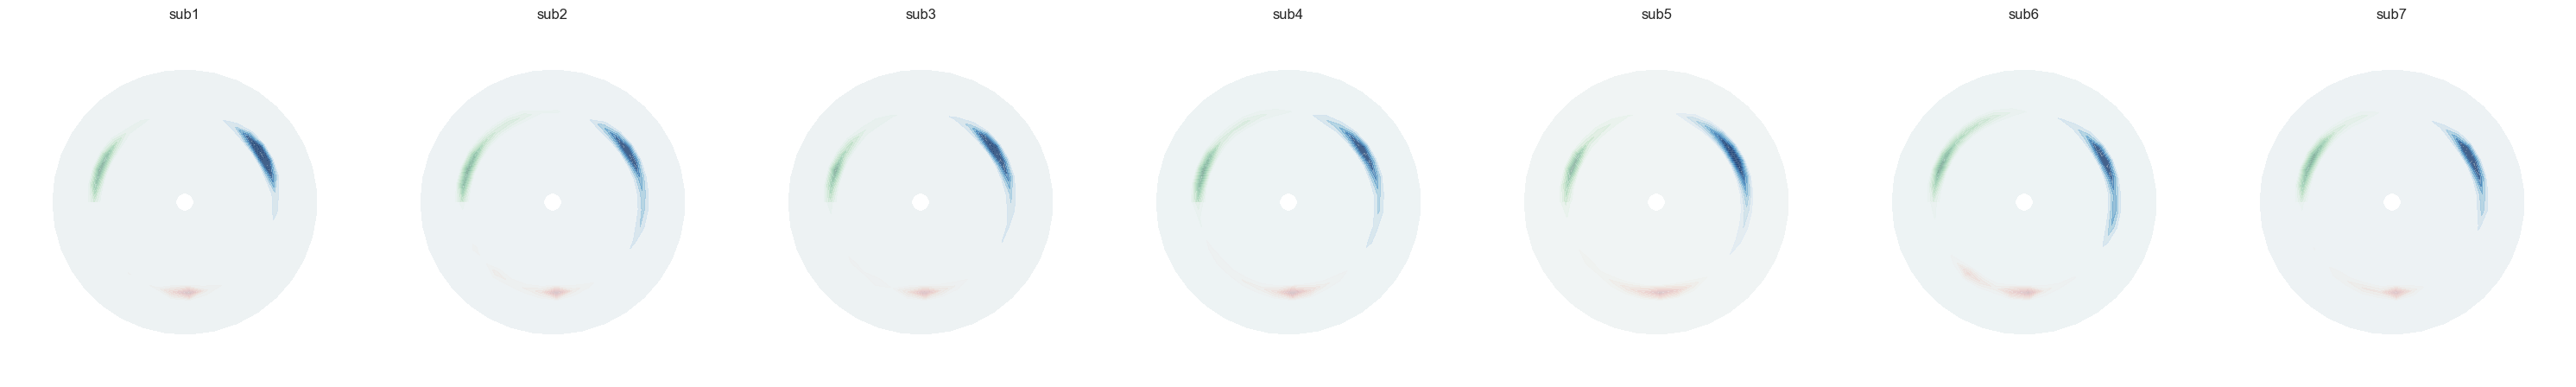

15
---- E ----


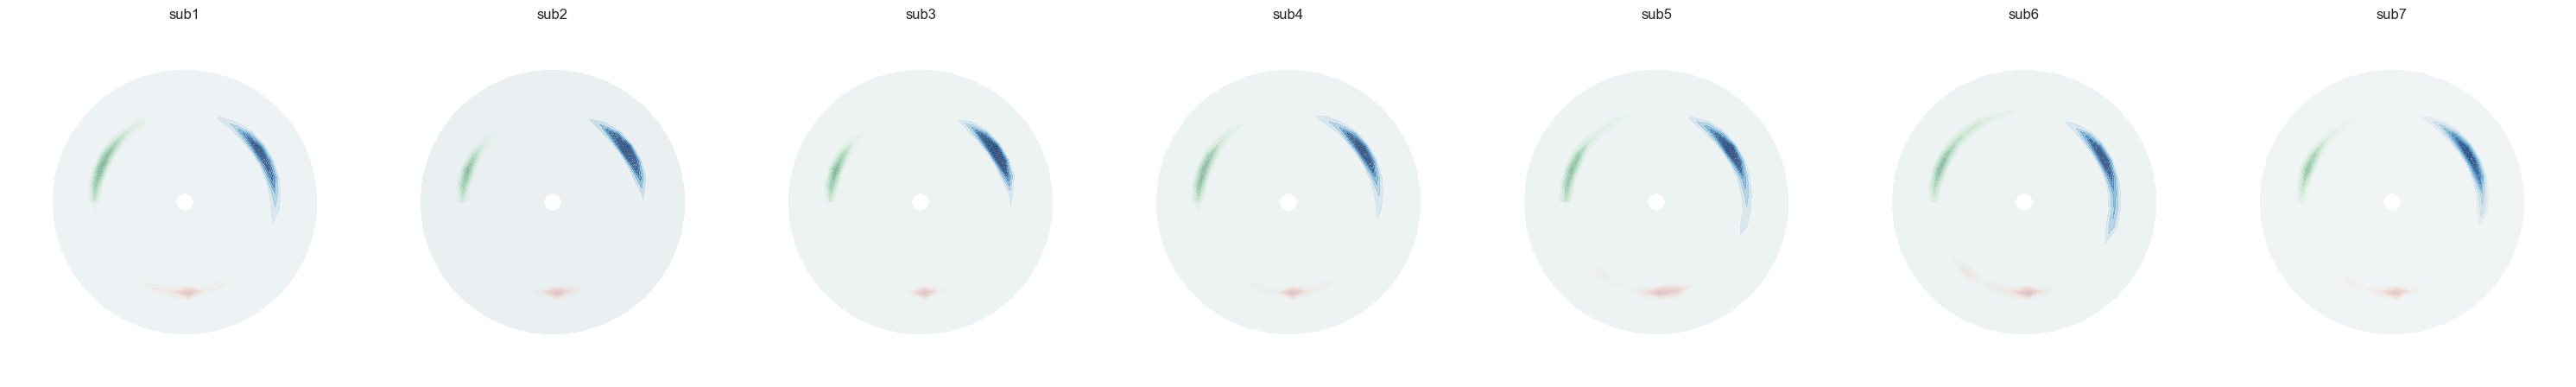

10
---- E ----


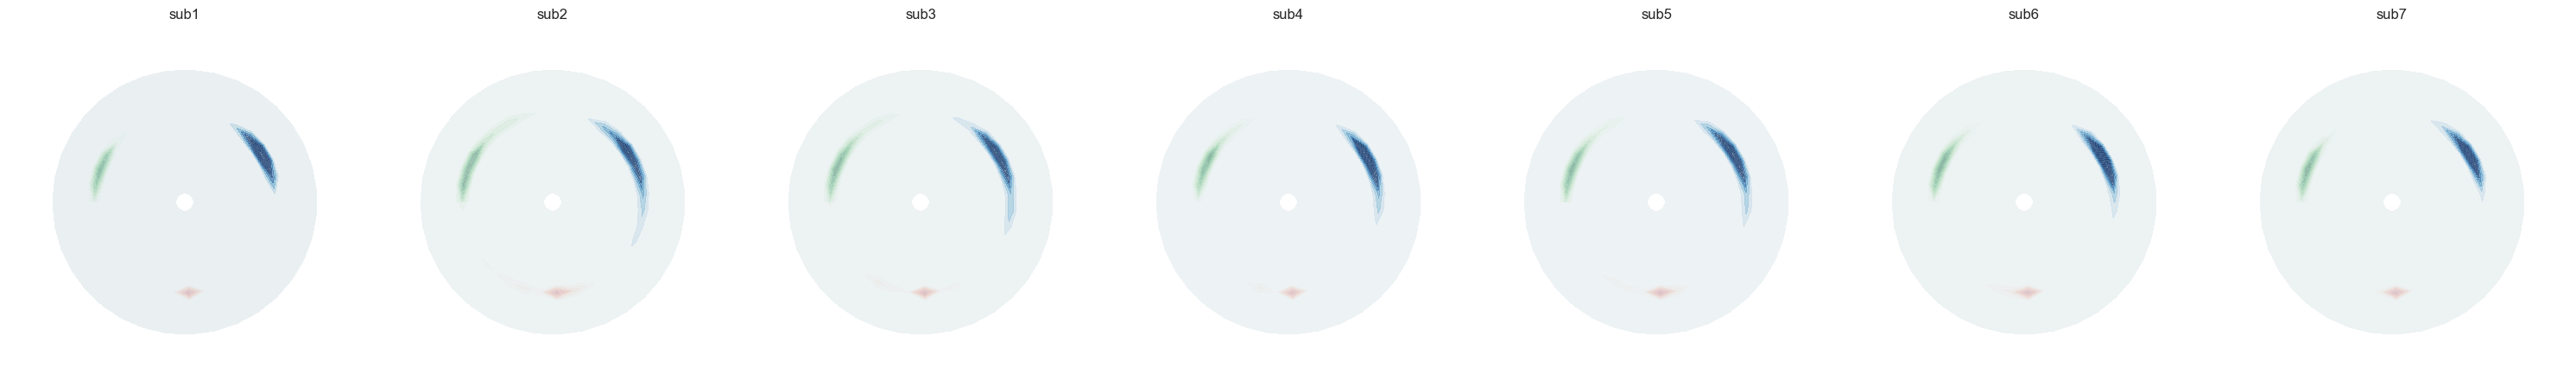

5
---- E ----


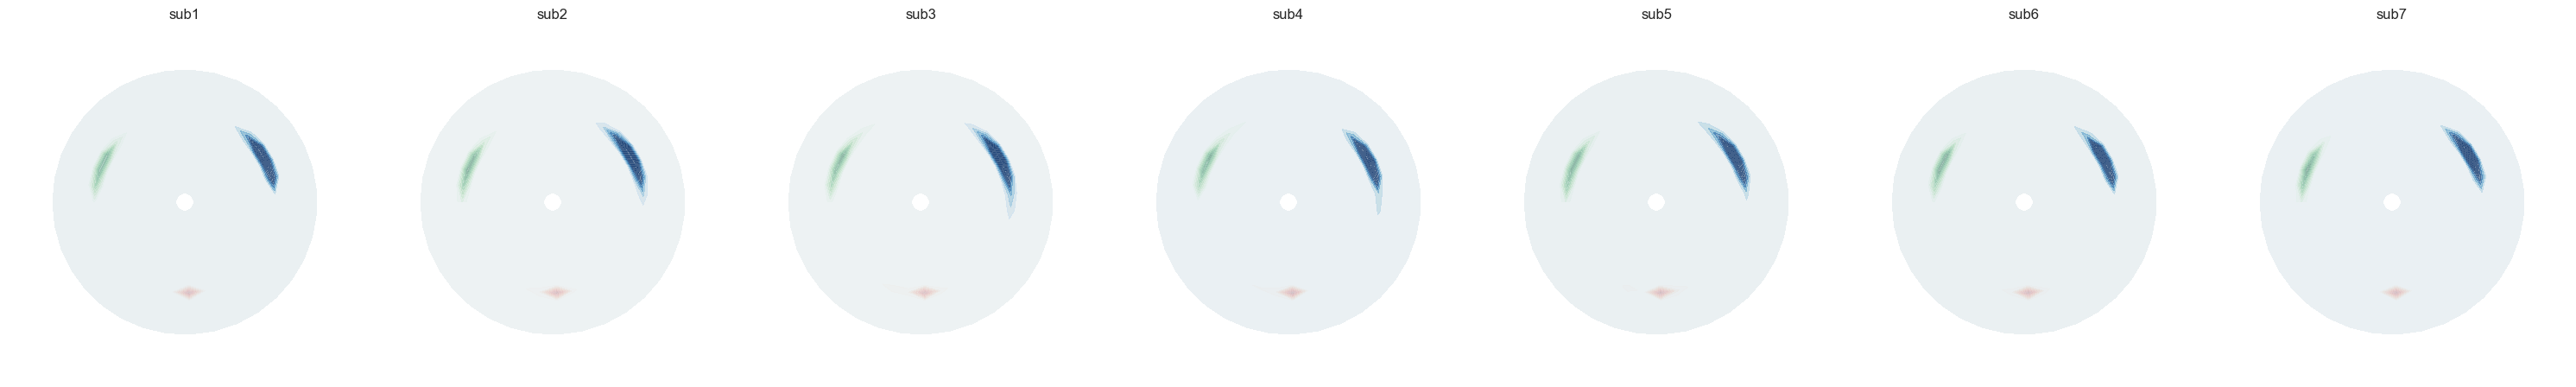

0
---- E ----


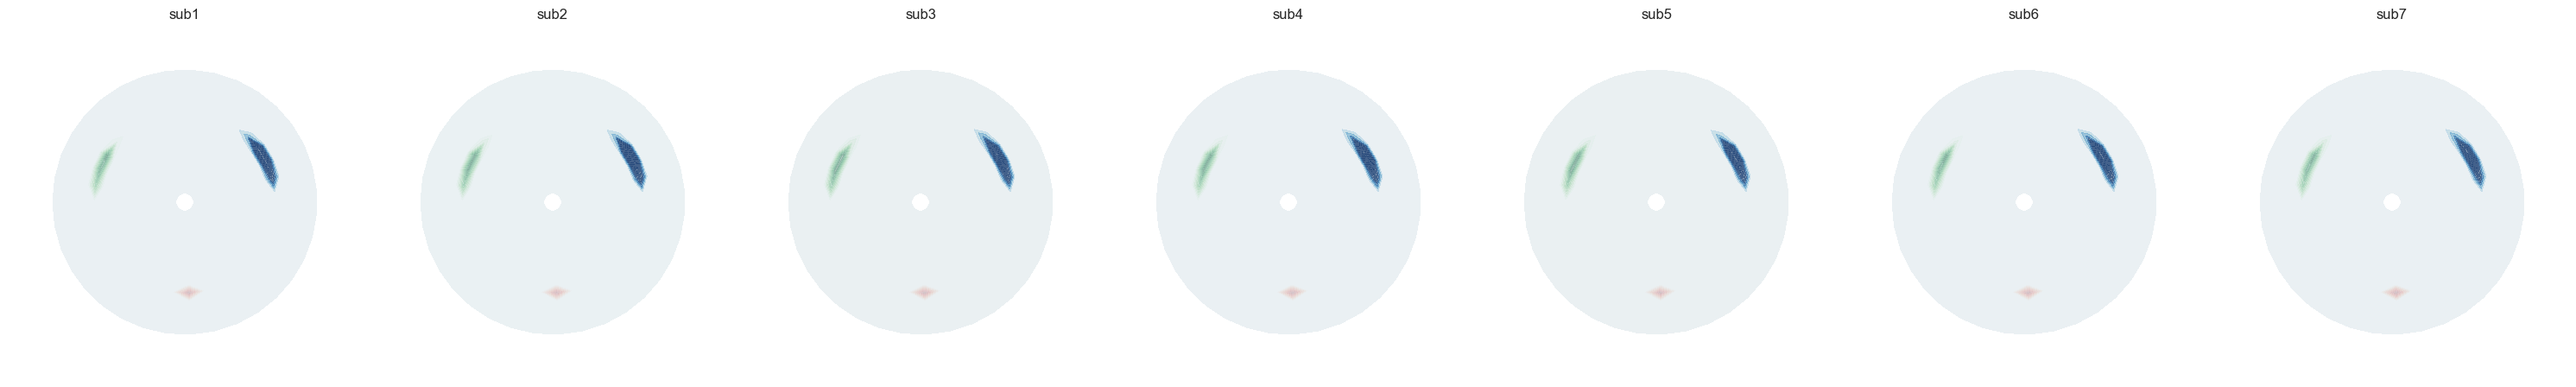

In [4]:
threshold_max_list = [50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 0]

for threshold_max in threshold_max_list:
    print(threshold_max)
    
    for alphabet_num in range(len(alphabets)):

        fig = plt.figure(figsize=(30,5))
        sns.set()
        sns.set_style('white')
        sns.set_palette('Set3')

        con_alphabet = alphabet
        print('----', con_alphabet, '----')

        for sub_num in range(7):

            ax = fig.add_subplot(1, 7, sub_num +1)
            ax.set_title('sub' + str(sub_num + 1))
            ax.set_xlim(-1, 1)
            ax.set_ylim(-1, 1)
            ax.set_xlabel("X-position")
            ax.set_ylabel("Y-position")
            ax.set_aspect('equal')

            sub = '{0:03d}'.format(sub_num+1)

            pos_a1_con = []
            pos_a2_con = []
            pos_a3_con = []
            for con_num in range(3):
                '''A1, A2, A3'''

                condition = con_alphabet + str(con_num + 1)

                load_name = f"../data/agent/max_sigma/max_{threshold_max}/sigma_0/agent{sub}/agent{sub}_{condition}.npy"
                pos_list = np.load(load_name, allow_pickle=True) 

                episodes = range(8)
                for episode in episodes:

                    pos_episode = pos_list[episode]

                    attacker1_pos_episode = pos_episode[1]
                    attacker2_pos_episode = pos_episode[2]
                    attacker3_pos_episode = pos_episode[3]

                    pos_a1_con.extend(attacker1_pos_episode)
                    pos_a2_con.extend(attacker2_pos_episode)
                    pos_a3_con.extend(attacker3_pos_episode)

            pos_circ_a1 = get_circ(pos_a1_con)
            heatmap_a1 = get_heatmap_circ(pos_circ_a1)
            pos_circ_a2 = get_circ(pos_a2_con)
            heatmap_a2 = get_heatmap_circ(pos_circ_a2)
            pos_circ_a3 = get_circ(pos_a3_con)
            heatmap_a3 = get_heatmap_circ(pos_circ_a3)

            r = np.linspace(-0.05, 0.75, 18)
            a = np.linspace(-np.pi , np.pi, 36)
            R, A = np.meshgrid(r, a)
            X, Y = R*np.cos(A), R*np.sin(A)

            cf = ax.contourf(X, Y, heatmap_a1, levels=10, cmap='Reds', alpha=0.5)
            cf = ax.contourf(X, Y, heatmap_a2, levels=10, cmap='Greens', alpha=0.5)
            cf = ax.contourf(X, Y, heatmap_a3, levels=10, cmap='Blues', alpha=0.5)
            cf.set_clim(1, 800)

            ax.axis('off')

        plt.tight_layout()
        plt.show()



# Fig. 3g

In [5]:

alphabets = list("ABCDEFGHI")  # A〜I

threshold_max_list = [50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 0]

threshold_all_pass_rate_a1_agent = []
threshold_all_pass_rate_a2_agent = []
threshold_all_pass_rate_a3_agent = []

for th_max in threshold_max_list:
    print(f"=== threshold_max = {th_max} ===")

    all_pass_rate_a1_agent = []
    all_pass_rate_a2_agent = []
    all_pass_rate_a3_agent = []

    for sub_num in range(28):

        pass_rate_a1 = []
        pass_rate_a2 = []
        pass_rate_a3 = []

        for alphabet_num in range(len(alphabets)):

            pass_outcome_a1 = []
            pass_outcome_a2 = []
            pass_outcome_a3 = []

            for con_num in range(3):

                con_alphabet = alphabets[alphabet_num]       
                sub = '{0:03d}'.format(sub_num + 1)
                condition = con_alphabet + str(con_num + 1)
                
                load_name = f"../data/agent/max_sigma/max_{th_max}/sigma_0/agent" + sub + "/agent" + sub + "_" + condition + ".npy"
                pos_list = np.load(load_name, allow_pickle=True)
                
                for episode in range(8):

                    pass_episode_a1 = []
                    pass_episode_a2 = []
                    pass_episode_a3 = []
                    
                    pos_episode = pos_list[episode]
                    defender_pos_episode = pos_episode[0]
                    attacker1_pos_episode = pos_episode[1]
                    attacker2_pos_episode = pos_episode[2]
                    attacker3_pos_episode = pos_episode[3]
                    ball_pos_episode = pos_episode[4]

                    pass_a1, pass_a2, pass_a3 = initial_pass_check(attacker1_pos_episode, attacker2_pos_episode, attacker3_pos_episode, ball_pos_episode)
                    pass_episode_a1.append(pass_a1)
                    pass_episode_a2.append(pass_a2)
                    pass_episode_a3.append(pass_a3)
                    
                    if pass_a1==1:
                        pass_outcome_a1.append(pass_a1)
                    elif pass_a2:
                        pass_outcome_a2.append(pass_a2)
                    elif pass_a3:
                        pass_outcome_a3.append(pass_a3)
                    
                    threshold = 1e-2
                    for t in range(len(defender_pos_episode) - 1):                

                        # attacker1
                        dist_now_1 = np.linalg.norm(attacker1_pos_episode[t] - ball_pos_episode[t])
                        dist_next_1 = np.linalg.norm(attacker1_pos_episode[t+1] - ball_pos_episode[t+1])
                        if dist_now_1 < threshold and dist_next_1 >= threshold:
                            pass_episode_a1.append(1)
                            pass_outcome_a1.append(1)
                        else:
                            pass_episode_a1.append(0)

                        # attacker2
                        dist_now_2 = np.linalg.norm(attacker2_pos_episode[t] - ball_pos_episode[t])
                        dist_next_2 = np.linalg.norm(attacker2_pos_episode[t+1] - ball_pos_episode[t+1])
                        if dist_now_2 < threshold and dist_next_2 >= threshold:
                            pass_episode_a2.append(1)
                            pass_outcome_a2.append(1)
                        else:
                            pass_episode_a2.append(0)
                                
                        # attacker3
                        dist_now_3 = np.linalg.norm(attacker3_pos_episode[t] - ball_pos_episode[t])
                        dist_next_3 = np.linalg.norm(attacker3_pos_episode[t+1] - ball_pos_episode[t+1])
                        if dist_now_3 < threshold and dist_next_3 >= threshold:
                            pass_episode_a3.append(1)
                            pass_outcome_a3.append(1)
                        else:
                            pass_episode_a3.append(0)
                        
                    last_pass = last_pass_check(defender_pos_episode, ball_pos_episode)                 
                    dist_next_b = np.linalg.norm(ball_pos_episode[-1] - np.array([0, 0]))
                    if last_pass == 0 or dist_next_b >= 0.8:
                        
                        idx_a1 = get_last_pass_index(pass_episode_a1)
                        idx_a2 = get_last_pass_index(pass_episode_a2)
                        idx_a3 = get_last_pass_index(pass_episode_a3)

                        last_idx = max(idx_a1, idx_a2, idx_a3)

                        if last_idx == idx_a1:
                            last_passer = "a1"
                        elif last_idx == idx_a2:
                            last_passer = "a2"
                        elif last_idx == idx_a3:
                            last_passer = "a3"
                        else:
                            last_passer = "none"
                            
                        if last_passer == "a1":
                            pass_outcome_a1[-1] = 0
                        elif last_passer == "a2":
                            pass_outcome_a2[-1] = 0
                        elif last_passer == "a3":
                            pass_outcome_a3[-1] = 0

            pass_rate_a1.append(np.mean(pass_outcome_a1))
            pass_rate_a2.append(np.mean(pass_outcome_a2))
            pass_rate_a3.append(np.mean(pass_outcome_a3))

        all_pass_rate_a1_agent.append(pass_rate_a1)
        all_pass_rate_a2_agent.append(pass_rate_a2)
        all_pass_rate_a3_agent.append(pass_rate_a3)

    all_pass_rate_a1_agent = np.array(all_pass_rate_a1_agent).T
    all_pass_rate_a2_agent = np.array(all_pass_rate_a2_agent).T
    all_pass_rate_a3_agent = np.array(all_pass_rate_a3_agent).T

    threshold_all_pass_rate_a1_agent.append(all_pass_rate_a1_agent)
    threshold_all_pass_rate_a2_agent.append(all_pass_rate_a2_agent)
    threshold_all_pass_rate_a3_agent.append(all_pass_rate_a3_agent)


=== threshold_max = 50 ===
=== threshold_max = 45 ===
=== threshold_max = 40 ===
=== threshold_max = 35 ===
=== threshold_max = 30 ===
=== threshold_max = 25 ===
=== threshold_max = 20 ===
=== threshold_max = 15 ===
=== threshold_max = 10 ===
=== threshold_max = 5 ===
=== threshold_max = 0 ===


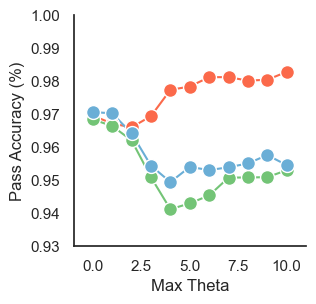

In [6]:
   
mean_pass_rate_a1_agent = np.array(threshold_all_pass_rate_a1_agent).mean(axis=2).mean(axis=1)
mean_pass_rate_a2_agent = np.array(threshold_all_pass_rate_a2_agent).mean(axis=2).mean(axis=1)
mean_pass_rate_a3_agent = np.array(threshold_all_pass_rate_a3_agent).mean(axis=2).mean(axis=1)

color_r = matplotlib.colormaps["Reds"](0.5)
color_g = matplotlib.colormaps["Greens"](0.5)
color_b = matplotlib.colormaps["Blues"](0.5)

point_size = 100
xs = range(11)
fig, ax = plt.subplots(figsize=(3, 3))

plt.plot(mean_pass_rate_a1_agent, color=color_r, zorder=0, alpha=1)
plt.plot(mean_pass_rate_a2_agent, color=color_g, zorder=0, alpha=1)
plt.plot(mean_pass_rate_a3_agent, color=color_b, zorder=0, alpha=1)

ax.scatter(xs, mean_pass_rate_a1_agent, color=color_r, edgecolor='white', s=point_size, zorder=1, alpha=1)
ax.scatter(xs, mean_pass_rate_a2_agent, color=color_g, edgecolor='white', s=point_size, zorder=1, alpha=1)
ax.scatter(xs, mean_pass_rate_a3_agent, color=color_b, edgecolor='white', s=point_size, zorder=1, alpha=1)

ax.set_xlabel("Max Theta")
ax.set_ylabel("Pass Accuracy (%)")
ax.set_xlim(-1, 11)
ax.set_ylim(0.93, 1)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
[ax.spines[side].set_visible(False) for side in ['right', 'top']]

plt.show()
